In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [2]:
# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

In [3]:
# merge the data sets
merged_df = pd.merge(ride_df,city_df, how="left", on ='city')
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
# average fare per city
data1= merged_df.groupby(["city"])
avg_fare_city = data1["fare"].mean()

# total number of rides
tot_ride_city = data1["ride_id"].count()

# total number of drivers
tot_drvr_city = data1["driver_count"].median() # I used median because the number was already counted
city_type = data1["type"].max()
final_df = pd.DataFrame({"Average Fare":avg_fare_city, "Total Rides":tot_ride_city,"Total Drivers":tot_drvr_city, "City Type":city_type})

In [5]:
final_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban_df = final_df.loc[final_df["City Type"] == "Urban", :]
suburban_df = final_df.loc[final_df["City Type"] == "Suburban", :]
rural_df = final_df.loc[final_df["City Type"] == "Rural", :]

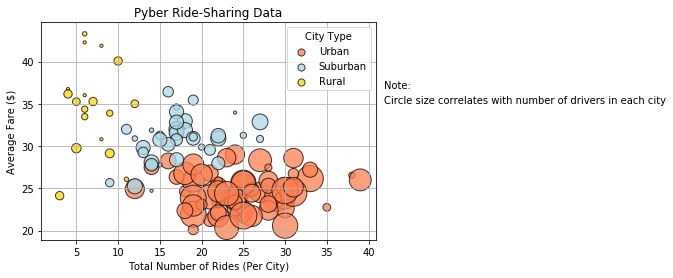

In [7]:
# Build the scatter plots for each city types
ax1 = urban_df.plot.scatter(x = "Total Rides", y = "Average Fare", s = 10 * urban_df["Total Drivers"], color = "coral", 
                            alpha = 0.75, edgecolors = "k", linewidths = 1, label = "Urban")
ax2 = suburban_df.plot.scatter(x = "Total Rides", y = "Average Fare", s = 10 * suburban_df["Total Drivers"], 
                               color = "lightblue", alpha = 0.75, edgecolors = "k", linewidths = 1, ax = ax1, label = "Suburban")
ax3 = rural_df.plot.scatter(x = "Total Rides", y = "Average Fare", s = 10 * rural_df["Total Drivers"], color = "gold", 
                            alpha = 0.75, edgecolors = "k", linewidths = 1, ax = ax1, label = "Rural")

# Create a legend
lgnd = plt.legend(title = "City Type", loc = "best")
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])

# Incorporate a text label regarding circle size
note = "Note:"
comment = "Circle size correlates with number of drivers in each city"
plt.figtext(.92,.65, note)
plt.figtext(.92, .6, comment)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride-Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.savefig("../Pyber/Pyber scatter plot.png")

## Total Fares by City Type

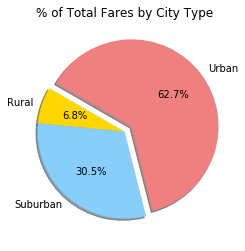

In [8]:
# Calculate Type Percents
type_df = merged_df.groupby("type")
fare_ratio = type_df["fare"].sum()
f_ratio_df = pd.DataFrame({"Total Fare":fare_ratio})
# Build Pie Chart
plt.pie(f_ratio_df["Total Fare"], explode = [0,0,0.1], colors =["gold","lightskyblue","lightcoral"], labels =  f_ratio_df.index.values, autopct = "%1.1f%%", shadow =True, startangle = 150) 
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Pyber/Total Fare by City Type.png")

## Total Rides by City Type

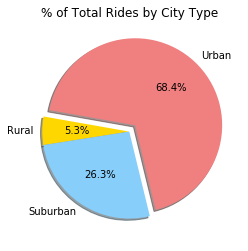

In [9]:
# Calculate Ride Percents
ride_ratio = type_df["ride_id"].count()
r_ratio_df = pd.DataFrame ({"Total Ride":ride_ratio})
# Build Pie Chart
plt.pie(r_ratio_df["Total Ride"], explode = [0,0,0.1], colors =["gold","lightskyblue","lightcoral"], labels =  r_ratio_df.index.values, autopct = "%1.1f%%", shadow =True, startangle = 170) 
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Pyber/Total Ride by City Type.png")



## Total Drivers by City Type

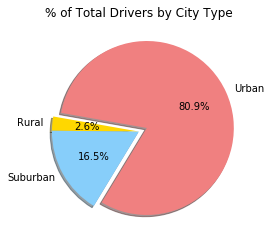

In [10]:
# Calculate Driver Percents

drv_df = city_df.groupby(["type"]) #using only city data to prevent duplicate data display
drv_ratio = drv_df["driver_count"].sum()
d_ratio_df = pd.DataFrame ({"Total Driver":drv_ratio})
# Build Pie Chart
plt.pie(d_ratio_df["Total Driver"], explode = [0,0,0.1], colors =["gold","lightskyblue","lightcoral"], labels =  d_ratio_df.index.values, autopct = "%1.1f%%", shadow =True, startangle = 170) 
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Pyber/Total Driver by City Type.png")





In [11]:
## Data Analysis
##(1) Average fare is high but the number of rides is the lowest in Rural areas. And the number of rides is high in Urban Area but Average fare is low.
##(2) Most people in Urban areas use car services more frequently than people in Rural areas and ride distance may be shorter in average, which results lower average fare amounts. 
##(3) The majority of rides happen in Urban areas(68.4%). But the ratio of total drivers in Urban areas is 80.9%. This could mean many drivers drive from Urban areas to other areas.